# Fashion MNIST

* В данном задании требуется с помощью ML модели - сделать предсказание, позволяющее делать классификацию по датасету FASHION MNIST, представляющему разные виды одежды в чб цвете.

* Для решения данной задачи мы использовали свёрточную нейросеть CNN - специально разработанную для классификации изображений, и опробированную на Fashion MNIST.

* Данная модель может находить признаки (например, края, формы) на картинках и может учиться распознавать классы (в данном случае — типы одежды в Fashion-MNIST).



In [98]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.callbacks import EarlyStopping  


In [99]:
# Загрузка данных с правильными путями
train_path = '/kaggle/input/dl2025miptml/fashion-mnist-testn/fmnist_train.csv'
test_path = '/kaggle/input/dl2025miptml/fashion-mnist-testn/fmnist_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
# Проверка данных
print("Форма обучающих данных:", train_df.shape)
print("Форма тестовых данных:", test_df.shape)
print("\nПропущенные значения в train:", train_df.isnull().sum().sum())
print("Пропущенные значения в test:", test_df.isnull().sum().sum())


Форма обучающих данных: (17040, 786)
Форма тестовых данных: (10000, 785)

Пропущенные значения в train: 424
Пропущенные значения в test: 0


In [24]:
# Первичный анализ данных 
print(train_df.head())
print(test_df.head())

print(train_df.info())
print(test_df.info())

print(train_df.describe())
print(test_df.describe())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0      30.0      43.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       1.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  Id  
0       0.0       0.0       0.0   0 

In [102]:
# 🧹 Предобработка
X = train_df.drop(['label', 'Id'], axis=1)
y = train_df['label']
X = X.fillna(X.median())
X = X.values.astype(np.float32) / 255.0
X = X.reshape(-1, 28, 28, 1)

X_test = test_df.drop(['Id'], axis=1)
test_ids = test_df['Id']
X_test = X_test.fillna(X_test.median())
X_test = X_test.values.astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

In [103]:
# ✂️ Разделение на обучение и валидацию
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [112]:
# 🧠 Простая CNN-модель 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  #👉 Сверточный слой:
# Берет изображение размера 28×28 с 1 каналом (чёрно-белое)
# Использует 32 фильтра (или «маски»), которые «сканируют» изображение кусочками 3×3
# ReLU — это функция активации, которая помогает "включать" важные признаки и "отсекать" мусор
    tf.keras.layers.MaxPooling2D(2, 2),
# Пуллинг (сжатие):
# Уменьшает размер изображения (в 2 раза), сохраняя важные признаки
# Помогает модели работать быстрее и устойчивее

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

# 👉 Второй сверточный слой:
# Теперь 64 фильтра, т.е. модель ищет более сложные формы
# Например: сначала она видела «линии», теперь — «воротники» или «пуговицы»

    tf.keras.layers.Flatten(),
#👉 Превращаем всё, что "видела" сеть, в один длинный вектор (чтобы передать в нейроны, как обычный список чисел)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

#👉 Полносвязный слой:
# 128 нейронов, которые обрабатывают признаки и ищут закономерности
# ReLU снова помогает фокусироваться на важных активах

In [114]:
# ⚙️ Компиляция
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [107]:
# Обучение
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    verbose=2
)

Epoch 1/10
240/240 - 11s - 44ms/step - accuracy: 0.7115 - loss: 0.7924 - val_accuracy: 0.8104 - val_loss: 0.5229
Epoch 2/10
240/240 - 7s - 28ms/step - accuracy: 0.8168 - loss: 0.4945 - val_accuracy: 0.8281 - val_loss: 0.4565
Epoch 3/10
240/240 - 7s - 27ms/step - accuracy: 0.8427 - loss: 0.4298 - val_accuracy: 0.8533 - val_loss: 0.4025
Epoch 4/10
240/240 - 7s - 27ms/step - accuracy: 0.8592 - loss: 0.3810 - val_accuracy: 0.8515 - val_loss: 0.3935
Epoch 5/10
240/240 - 7s - 30ms/step - accuracy: 0.8693 - loss: 0.3558 - val_accuracy: 0.8627 - val_loss: 0.3861
Epoch 6/10
240/240 - 7s - 28ms/step - accuracy: 0.8764 - loss: 0.3307 - val_accuracy: 0.8773 - val_loss: 0.3515
Epoch 7/10
240/240 - 10s - 43ms/step - accuracy: 0.8817 - loss: 0.3118 - val_accuracy: 0.8773 - val_loss: 0.3414
Epoch 8/10
240/240 - 7s - 28ms/step - accuracy: 0.8915 - loss: 0.2935 - val_accuracy: 0.8750 - val_loss: 0.3396
Epoch 9/10
240/240 - 7s - 30ms/step - accuracy: 0.8959 - loss: 0.2771 - val_accuracy: 0.8809 - val_los

In [108]:
# 📤 Предсказания
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


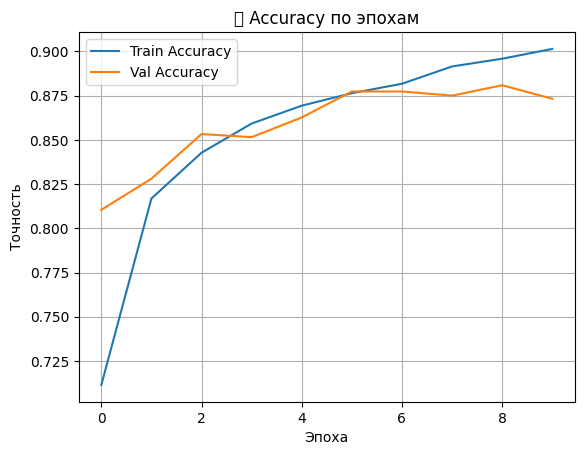

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


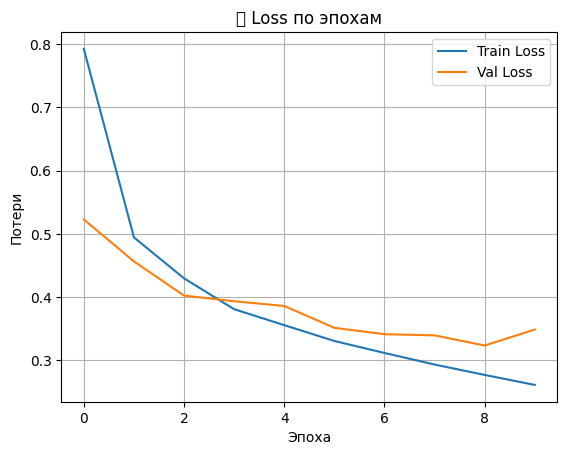

In [115]:
import matplotlib.pyplot as plt

# Точность
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Accuracy по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)
plt.show()

# Потери
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Loss по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)
plt.show()

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


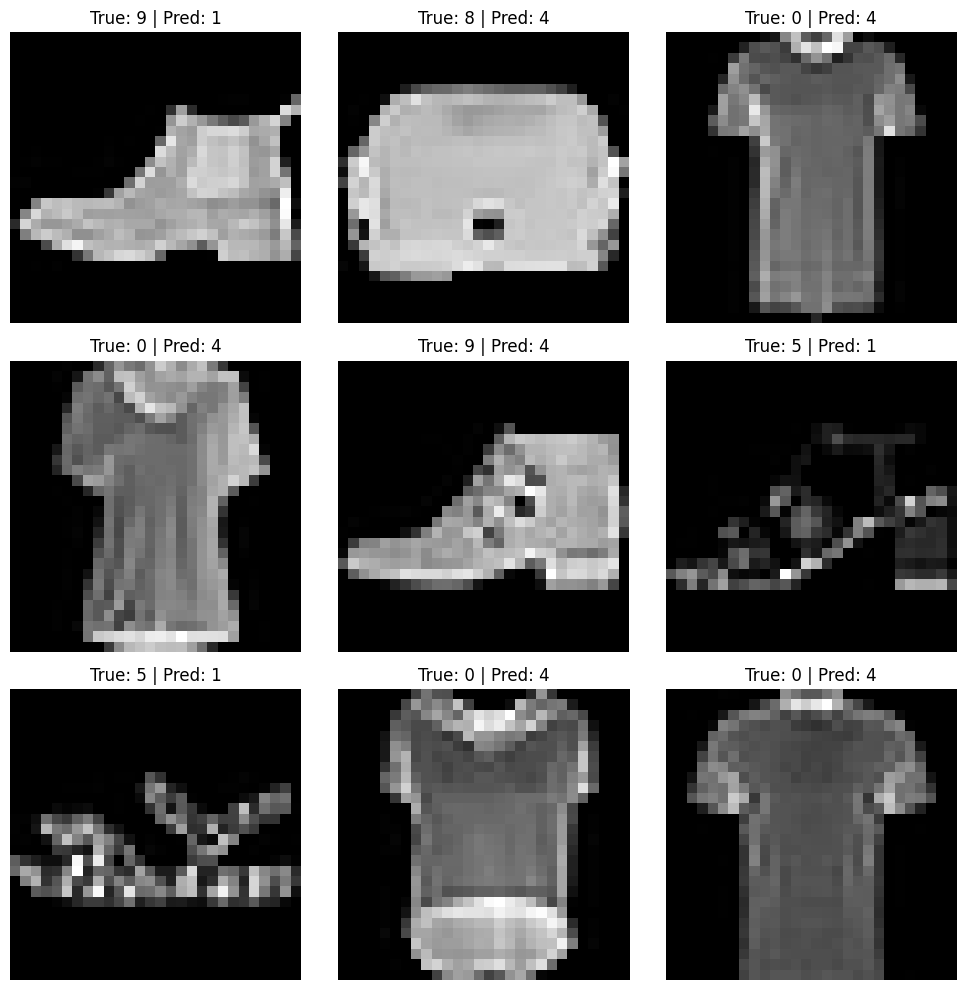

In [116]:
import numpy as np

# Предсказания
val_preds = model.predict(X_val)
val_pred_labels = np.argmax(val_preds, axis=1)

# Покажем 9 картинок с предсказаниями
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_val[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_val.iloc[i]} | Pred: {val_pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [117]:
model.save("baseline_cnn.h5")


In [109]:
# 📝 Шаг 9. Подготовка submission-файла
submission = pd.DataFrame({
    'Id': test_ids,
    'label': predicted_labels
})
submission.to_csv("/kaggle/working/submission_MNIST3.csv", index=False)